ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ


Основные задачи:
- освоение технологии внедрения алгоритмов линейной классификации
в приложения;
- изучение основных приемов рабты с разреженными матрицами в ходе
машинного обучения;
- освоение техники построения, обучения и оценки модели
логистической регресии;
- освоение приемов работы с синтезированными признаками,
масштабированием и настройкой гипперпараметров.

Импортируем необходимые библиотеки

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Загружаем датасет

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Предобработка данных
X = df.drop('quality', axis=1)
y = df['quality'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#2.1 В рамках выполнения задания необходимо ввести 2 новых синтезированных признака, оценить изменение точности модели после добавления признаков (с применением масштабирования признаков и без).

In [ ]:
# Обучение модели без масштабирования признаков
model = LogisticRegression(solver='lbfgs', max_iter=6000)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

auc_score_without_scaling = roc_auc_score(y_test, y_pred, multi_class='ovr')
print('AUC-ROC score without scaling:', auc_score_without_scaling)

AUC-ROC score without scaling: 0.8396038060716022


In [ ]:
# Создание новых признаков
X_train['new_feature_1'] = X_train['alcohol'] * X_train['volatile acidity']
X_train['new_feature_2'] = X_train['chlorides'] / X_train['density']
X_test['new_feature_1'] = X_test['alcohol'] * X_test['volatile acidity']
X_test['new_feature_2'] = X_test['chlorides'] / X_test['density']

In [ ]:
print(X_train)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
493             8.7             0.690         0.31             3.0      0.086   
354             6.1             0.210         0.40             1.4      0.066   
342            10.9             0.390         0.47             1.8      0.118   
834             8.8             0.685         0.26             1.6      0.088   
705             8.4             1.035         0.15             6.0      0.073   
...             ...               ...          ...             ...        ...   
1130            9.1             0.600         0.00             1.9      0.058   
1294            8.2             0.635         0.10             2.1      0.073   
860             7.2             0.620         0.06             2.7      0.077   
1459            7.9             0.200         0.35             1.7      0.054   
1126            5.8             0.290         0.26             1.7      0.063   

      free sulfur dioxide  

In [ ]:
# Обучение модели с масштабированием признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(solver='lbfgs', max_iter=6000)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict_proba(X_test_scaled)
auc_score_with_scaling = roc_auc_score(y_test, y_pred_scaled, multi_class='ovr')
print('AUC-ROC score with scaling:', auc_score_with_scaling)

AUC-ROC score with scaling: 0.8437627085272732


#2.2 После определения необходимого набора признаков необходимо сформировать набор значений гипперпараметра модели и выбрать оптимальное значение. Постройте график (AUC-ROC, гипперпараметр C).

In [ ]:
def get_auc_lr_valid(X, y, C=1.0):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model_scaled = LogisticRegression(C=C, n_jobs=-1, solver='lbfgs', max_iter=6000)
    model_scaled.fit(X_train_scaled, y_train)
    y_pred_scaled = model_scaled.predict_proba(X_test_scaled)
    auc_score_with_scaling = roc_auc_score(y_test, y_pred_scaled, multi_class='ovr')
    return auc_score_with_scaling

In [ ]:
# набор возможных значений С
Cs = np.logspace(-3, 1, 10)

scores = []

for C in Cs:
    sc = get_auc_lr_valid(X_train, y_train, C=C)
    scores.append(sc)
    print(C, ' -> ', sc)

0.001  ->  0.8059707043171581
0.0027825594022071257  ->  0.8149896468482195
0.007742636826811269  ->  0.8215475884209414
0.021544346900318832  ->  0.8310758038237237
0.05994842503189409  ->  0.8372655879860867
0.1668100537200059  ->  0.8421798685319817
0.46415888336127775  ->  0.8475083162618605
1.2915496650148828  ->  0.8443898684973833
3.593813663804626  ->  0.8457426228619336
10.0  ->  0.8452783947436115


In [ ]:
# Максимальная точность
C = np.max(scores)
print(C)

0.8475083162618605


In [ ]:
# зафиксируем качество с параметрами по умолчанию
score_C_1 = get_auc_lr_valid(X_train, y_train)
print(score_C_1)

0.8437627085272732


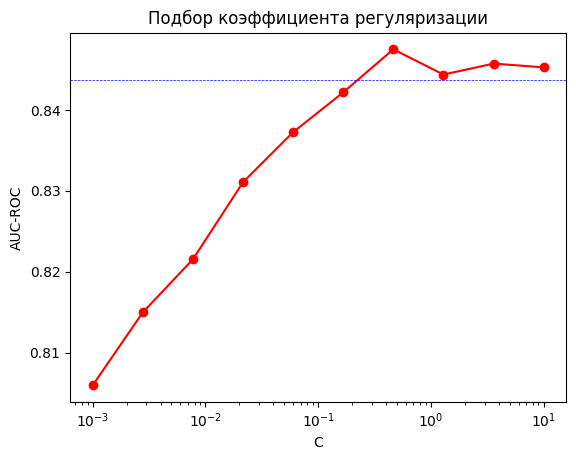

In [ ]:
# График
plt.plot(Cs, scores, 'ro-')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('AUC-ROC')
plt.title('Подбор коэффициента регуляризации')
# горизонтальная линия -- качество модели с коэффициентом по умолчанию
plt.axhline(y=score_C_1, linewidth=.5, color = 'b', linestyle='dashed')
plt.show()

In [ ]:
# 0.46415888336127775  ->  0.8475083162618605
score_result = get_auc_lr_valid(X_train, y_train, C=0.46415888336127775)
print(score_result)

0.8475083162618605


#2.3 После обучения модели необходимо сохранить на диск значения бейслайн.

In [ ]:
# функция для записи прогнозов в файл
def write_to_submission_file(predicted_labels, out_file,
                             target='target', index_label="session_id"):
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(1, predicted_labels.shape[0] + 1),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [ ]:
# обучим модель на всей выборке с оптимальным коэффициентом регуляризации
lr = LogisticRegression(C=C, n_jobs=-1, solver='lbfgs', max_iter=6000).fit(X_train, y_train)
# сделаем прогноз для тестовой выборки
y_test = lr.predict_proba(X_test)[:, 1]
print(y_test)
# запишем его в файл, готовый для сабмита
write_to_submission_file(y_test, 'baseline_res.csv')

[0.03570634 0.01142251 0.03050537 0.01395537 0.02748964 0.01267216
 0.00782827 0.09038985 0.02401405 0.05359131 0.01829511 0.10822757
 0.03228099 0.02686757 0.01415342 0.0040642  0.03772736 0.01786945
 0.00556715 0.03866907 0.15115666 0.03111784 0.04106808 0.01881624
 0.05870065 0.04344871 0.00534837 0.05606982 0.05335285 0.00807582
 0.03518834 0.03197082 0.01729053 0.04471702 0.04249739 0.02303239
 0.02170812 0.07877831 0.02563576 0.01249336 0.02544985 0.02053297
 0.01199453 0.0184916  0.01939487 0.06282961 0.00489093 0.01417592
 0.09408923 0.07348007 0.032779   0.02415993 0.08342014 0.02482517
 0.04231907 0.02633807 0.03465756 0.13734233 0.02184161 0.06545816
 0.02367296 0.01626036 0.02591274 0.0296302  0.0018641  0.01049751
 0.0059166  0.07763059 0.00786538 0.01382816 0.00413827 0.06877412
 0.01819925 0.02698424 0.01864314 0.03636019 0.00367491 0.00767513
 0.03374594 0.00354401 0.04729545 0.00462814 0.0236426  0.04215704
 0.02595598 0.00509189 0.01634637 0.0536566  0.00571166 0.1312

# Контрольные вопросы

In [1]:
from __future__ import division, print_function
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import pickle
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

In [2]:
train_df = pd.read_csv('https://raw.githubusercontent.com/ontaev/Alice/master/train_sessions.csv', index_col='session_id')
test_df = pd.read_csv('https://raw.githubusercontent.com/ontaev/Alice/master/test_sessions.csv', index_col='session_id')

times = ['time%s' % i for i in range(1, 11)]
train_df[times] = train_df[times].apply(pd.to_datetime)
test_df[times] = test_df[times].apply(pd.to_datetime)
train_df = train_df.sort_values(by='time1')

print(train_df.shape)
print(test_df.shape)
train_df.head()

(253561, 21)
(82797, 20)


,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
21669,56,2013-01-12 08:05:57,55.0,2013-01-12 08:05:57,NaN,NaT,NaN,NaT,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
54843,56,2013-01-12 08:37:23,55.0,2013-01-12 08:37:23,56.0,2013-01-12 09:07:07,55.0,2013-01-12 09:07:09,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
77292,946,2013-01-12 08:50:13,946.0,2013-01-12 08:50:14,951.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:16,...,2013-01-12 08:50:16,948.0,2013-01-12 08:50:16,784.0,2013-01-12 08:50:16,949.0,2013-01-12 08:50:17,946.0,2013-01-12 08:50:17,0
114021,945,2013-01-12 08:50:17,948.0,2013-01-12 08:50:17,949.0,2013-01-12 08:50:18,948.0,2013-01-12 08:50:18,945.0,2013-01-12 08:50:18,...,2013-01-12 08:50:18,947.0,2013-01-12 08:50:19,945.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:20,0
146670,947,2013-01-12 08:50:20,950.0,2013-01-12 08:50:20,948.0,2013-01-12 08:50:20,947.0,2013-01-12 08:50:21,950.0,2013-01-12 08:50:21,...,2013-01-12 08:50:21,946.0,2013-01-12 08:50:21,951.0,2013-01-12 08:50:22,946.0,2013-01-12 08:50:22,947.0,2013-01-12 08:50:22,0


1. За какие года представлены данные в обучающей и тестовой
выборках? Ответ нужно аргументировать кодом на Python.

In [3]:
# Считаем даты из датасетов и определим года
times = range(1, 11)
unuq_train_years = []
unuq_test_years = []
for number in times:
  indx = "time" + str(number)
  train_years = pd.to_datetime(train_df[indx]).dt.year.dropna().unique()
  test_years = pd.to_datetime(test_df[indx]).dt.year.dropna().unique()
  # print(indx, train_years)
  unuq_train_years += train_years.astype(int).tolist()
  unuq_test_years += test_years.astype(int).tolist()


print("Года в обучающей выборке:", set(train_years))
print("Года в тестовой выборке:", set(test_years))

Года в обучающей выборке: {2013.0, 2014.0}
Года в тестовой выборке: {2014.0}


2. Исследуйте с использованием Python исходный набор данных и дайте
ответ на следующий вопрос: какие сайты чаще всего посещает Элис? Для
ответа на вопрос можно доработать код пункта 4 учебного задания.

In [11]:
# Отфильтруем строки, где значение в столбце 'target' равно 1 (т.е сеанс принадлежит Элис)
df_alice = train_df[train_df['target'] == 1]

sites = ['site%s' % i for i in range(1, 11)]

top_sites = pd.Series(df_alice[sites].fillna(0).values.flatten()
                     ).value_counts().sort_values(ascending=False).head(5)
print("ID часто посещаемых саитый:", top_sites.index)
# sites_dict.iloc[top_sites.index]

ID часто посещаемых саитый: Float64Index([77.0, 80.0, 76.0, 29.0, 21.0], dtype='float64')


3. На языке Python реализуйте проверку следующих утверждений:
- Сессия Элис в среднем короче, чем сессия остальных пользователей. (да)

In [34]:
times = ['time%s' % i for i in range(1, 11)]

Создадим датафрейм времени остальных пользователей

In [38]:
# создадим отдельный датафрейм, где будем работать со временем
time_df_other = pd.DataFrame(index=train_df.index)
time_df_other['target'] = train_df['target']
time_df_other = time_df_other[time_df_other['target'] == 0].copy() # Берем сессии только Элис

# # найдем время начала и окончания сессии
time_df_other['min'] = train_df[times].min(axis=1)
time_df_other['max'] = train_df[times].max(axis=1)

# # вычислим длительность сессии и переведем в секунды
time_df_other['seconds'] = (time_df_other['max'] - time_df_other['min']) / np.timedelta64(1, 's')

time_df_other.head()

,target,min,max,seconds
session_id,,,,
21669,0,2013-01-12 08:05:57,2013-01-12 08:05:57,0.0
54843,0,2013-01-12 08:37:23,2013-01-12 09:07:09,1786.0
77292,0,2013-01-12 08:50:13,2013-01-12 08:50:17,4.0
114021,0,2013-01-12 08:50:17,2013-01-12 08:50:20,3.0
146670,0,2013-01-12 08:50:20,2013-01-12 08:50:22,2.0


In [42]:
# Найдем среднее кол-во секунд сессии других пользователей
avg_other = time_df_other["seconds"].mean()
avg_other

139.28237232552215

Создадим датафрейм времени Элис

In [36]:
# создадим отдельный датафрейм, где будем работать со временем
time_df_alice = pd.DataFrame(index=train_df.index)
time_df_alice['target'] = train_df['target']
time_df_alice = time_df_alice[time_df_alice['target'] == 1].copy() # Берем сессии только Элис

# # найдем время начала и окончания сессии
time_df_alice['min'] = train_df[times].min(axis=1)
time_df_alice['max'] = train_df[times].max(axis=1)

# # вычислим длительность сессии и переведем в секунды
time_df_alice['seconds'] = (time_df_alice['max'] - time_df_alice['min']) / np.timedelta64(1, 's')

time_df_alice.head()

,target,min,max,seconds
session_id,,,,
251175,1,2013-02-12 16:25:10,2013-02-12 16:32:27,437.0
196388,1,2013-02-12 16:32:27,2013-02-12 16:32:53,26.0
172448,1,2013-02-12 16:32:53,2013-02-12 16:33:46,53.0
70129,1,2013-02-12 16:33:50,2013-02-12 16:33:53,3.0
206254,1,2013-02-12 16:33:55,2013-02-12 16:34:25,30.0


In [41]:
# Найдем среднее кол-во секунд сессии Элис
avg_alice = time_df_alice["seconds"].mean()
avg_alice

52.29647366129734

In [44]:
# Ответ
avg_alice < avg_other

True

- Доля сессий Элис в выборке превышает 1%. (нет)


In [52]:
shape_other = time_df_other.shape # размер датафрейма пользователей
shape_alice = time_df_alice.shape # размер датафрейма Элис
print(shape_other) # размер датафрейма пользователей
print(shape_alice) # размер датафрейма Элис

# Доля сессии Элис
print("Доля сессии Элис:", (shape_alice[0] / (shape_other[0] + shape_alice[0])) * 100, "%")

(251264, 4)
(2297, 4)
Доля сессии Элис: 0.905896411514389 %


- Диапазоны длительности сессий Элис и остальных пользователей
примерно одинаковы. (да)


In [63]:
# time_df_other['seconds'].max() # Максимальный диапазон сессии пользователей
# time_df_alice['seconds'].max() # Максимальный диапазон сессии Элис

print(time_df_other['seconds'].max(), "~", time_df_alice['seconds'].max())

1800.0 ~ 1763.0


- Доля сессий Элис длительностью 40 с и более составляет менее
четверти. (да)

In [68]:
# Найдем кол-во сессии Элис длительностью  >= 40 c
count = time_df_alice[time_df_alice['seconds'] >= 40]
# Найдем отношение кол-во сессии >= 40 c / общее кол-во сессий
print(count.shape[0] / shape_alice[0], "~", 1/4)

0.2411841532433609 ~ 0.25


4. В рамках подпункта 9 учебной задачи постройте график зависимости
количества сессий Элис от синтезированного признака start_month. Проверьте
следующие утверждения:
- с начала 2013 года по середину 2014 года количество ежемесячных
сессий уменьшилось; (нет)
- в целом количество сессий Элис за месяц постоянно на протяжении
всего периода; (нет)
- с начала 2013 года по середину 2014 года количество ежемесячных
сессий возросло (да)


In [84]:
# объединенная таблица исходных данных
full_df = pd.concat([train_df.drop('target', axis=1), test_df])
# индекс, по которому будем отделять обучающую выборку от тестовой
idx_split = train_df.shape[0]
# наша целевая переменная
y_train = train_df['target']

In [76]:
# датафрейм для новых признаков
full_new_feat = pd.DataFrame(index=full_df.index)

# добавим признак start_month
full_new_feat['start_month'] = full_df['time1'].apply(lambda ts: 100 * ts.year + ts.month)
full_new_feat

,start_month
session_id,
21669,201301
54843,201301
77292,201301
114021,201301
146670,201301
...,...
82793,201410
82794,201405
82795,201405


start_month
201301      0
201302     61
201303      0
201304     38
201305      0
201306      0
201307      0
201308      0
201309    377
201310      0
201311    446
201312    134
201401    129
201402    410
201403    400
201404    302
Name: target, dtype: int64


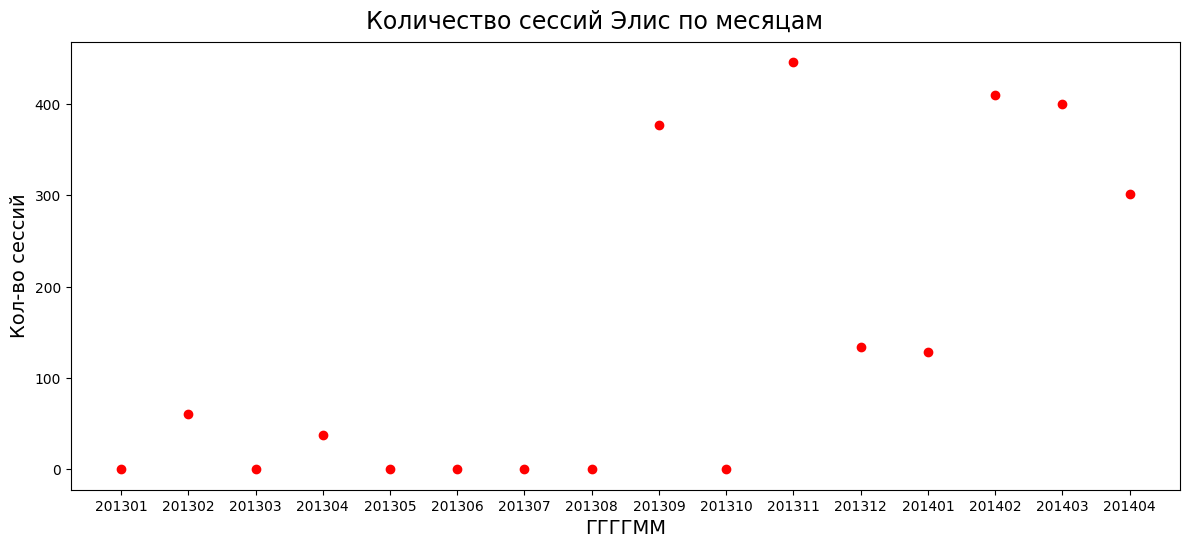

In [85]:
# рассчитаем количество сессий Элис по месяцам
tmp = full_new_feat.loc[:idx_split, 'start_month'].to_frame()
tmp['target'] = y_train
stm_vs_target = tmp.groupby('start_month')['target'].sum()

# вывод таблички
print(stm_vs_target)


# построим график
x_axis = stm_vs_target.index
y_axis = stm_vs_target.values
fig=plt.figure(figsize=(12, 8))
ax1=fig.add_subplot(111)
line1 = ax1.plot(y_axis,'ro',label='line1')
plt.xticks(range(len(y_axis)), x_axis)
ax1.set_ylabel('y values',fontsize=12)
lines = line1
labels = [l.get_label() for l in lines]
ax1.set_xlabel('ГГГГММ',fontsize=14)
ax1.set_ylabel('Кол-во сессий',fontsize=14)
plt.setp(ax1.get_xticklabels(), visible=True)
plt.suptitle(u'Количество сессий Элис по месяцам', y=1.0, fontsize=17)
fig.tight_layout()
fig.subplots_adjust(top=0.96,bottom=0.4)
plt.show()

5. Какие методы классификации являются линейными? Укажите
основные параметры линеймой модели классификации. Что такое
гипперпараметры линейной модели?

Линейные методы классификации основаны на предположении о том, что существует линейная зависимость между признаками и целевой переменной. Некоторые из основных линейных методов классификации включают в себя логистическую регрессию, метод опорных векторов (Support Vector Machines), и линейный дискриминантный анализ.
Основные параметры линейной модели классификации:

- Веса (коэффициенты) при признаках: определяют вклад каждого признака в предсказание модели.
- Смещение (intercept): константа, добавляемая к результату линейной комбинации признаков.
- Функция потерь: определяет, как модель штрафуется за неправильные предсказания.
- Регуляризация: метод контроля за сложностью модели путем добавления штрафа за большие значения весов.

Гиперпараметры линейной модели:
- Гиперпараметры линейной модели - это параметры модели, которые не могут быть обучены в процессе обучения и должны быть установлены до начала процесса обучения. Примеры гиперпараметров для линейных моделей включают в себя коэффициент регуляризации, тип регуляризации, скорость обучения и другие параметры, которые влияют на обучение и поведение модели.

6. Поясните назначение и принципы реализации методов
стахостического градиента.

Методы стохастического градиента (SGD) используются для оптимизации функций, минимизируя их посредством итеративного обновления параметров модели в направлении, противоположном градиенту функции потерь. Основное назначение SGD - это эффективное обучение моделей на больших объемах данных.
Принципы реализации методов стохастического градиента включают:

- Выбор функции потерь и оптимизируемой метрики.
- Выбор скорости обучения (learning rate) - параметра, определяющего размер шага при обновлении параметров модели.
- Итеративное обновление параметров модели на основе случайно выбранных подмножеств (батчей) данных.
- Остановка обучения по достижении определенного критерия (например, достижение определенного значения функции потерь или количество итераций).

7. Что такое «линейно разделимая выборка»?

Линейно разделимая выборка - это выборка данных, в которой объекты разных классов можно идеально разделить с помощью гиперплоскости в пространстве признаков. Другими словами, существует линейное правило, которое точно разделяет объекты разных классов без ошибок.
